In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
os.listdir()

['__pycache__',
 'maxent.py',
 '.git',
 '.ipynb_checkpoints',
 'Maximum Entropy.ipynb']

In [47]:
from maxent import MaxEnt

In [134]:
mean = 2.8
payoff = lambda i : i
model = MaxEnt(6 , payoff)

In [135]:
model.fit(mean , verbose = True , start = 0, max_iter = 100)

iteration 0:	-0.2400000000000001	-0.02369602503946666
iteration 1:	-0.24901085392289896	-9.03212266027964e-05
iteration 2:	-0.24904546520112664	-1.3547216681786267e-09
iteration 3:	-0.2490454657202743	8.881784197001252e-16


In [136]:
model.proba

array([0.28424292, 0.22158001, 0.17273149, 0.13465188, 0.10496714,
       0.08182656])

In [137]:
model.multiplier

-0.2490454657202743

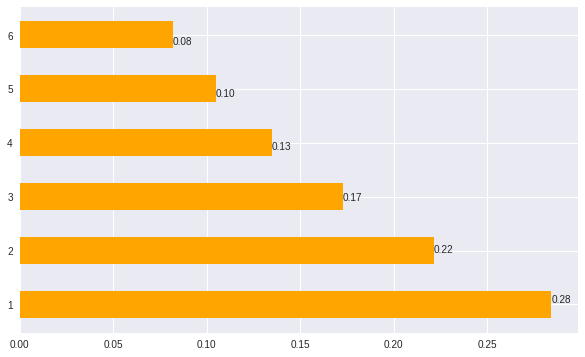

In [138]:
fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))

ax.barh(range(1,events+1),
         model.proba,
         color = 'orange',
         height = 0.5)

for i , patch in enumerate(ax.patches):
    ax.annotate( text = f"{model.proba[i]:.2f}" , 
                 xy = (patch.get_x() + model.proba[i] , 
                       patch.get_y() + patch.get_width())
               )

In [143]:
means = np.linspace(1,6,100)
probabilities = None
model = MaxEnt(6)

for sample_mean in means:
    model.fit(sample_mean)
    if probabilities is not None:
        probabilities = np.vstack([probabilities , model.predict_proba])
    else:
        probabilities = model.predict_proba
probabilities

array([[1.00000000e+00, 8.95635715e-11, 8.02163334e-21, 7.18446131e-31,
        6.43466015e-41, 5.76311144e-51],
       [9.51923022e-01, 4.57655938e-02, 2.20027201e-03, 1.05782456e-04,
        5.08570209e-06, 2.44505249e-07],
       [9.08254471e-01, 8.33287792e-02, 7.64508810e-03, 7.01406797e-04,
        6.43513179e-05, 5.90398058e-06],
       [8.68402058e-01, 1.14283842e-01, 1.50400340e-02, 1.97930538e-03,
        2.60481444e-04, 3.42799973e-05],
       [8.31857689e-01, 1.39886122e-01, 2.35234072e-02, 3.95572255e-03,
        6.65198741e-04, 1.11860567e-04],
       [7.98182344e-01, 1.61130408e-01, 3.25276655e-02, 6.56641437e-03,
        1.32557308e-03, 2.67595659e-04],
       [7.66998056e-01, 1.78806471e-01, 4.16842698e-02, 9.71764805e-03,
        2.26542732e-03, 5.28127887e-04],
       [7.37981689e-01, 1.93541917e-01, 5.07579989e-02, 1.33117130e-02,
        3.49110892e-03, 9.15572735e-04],
       [7.10858657e-01, 2.05836479e-01, 5.96020822e-02, 1.72583996e-02,
        4.99734816e-03, 

In [171]:
from random import random as rand

def RiskyAsset():
    roll = rand()
    if roll <= 0.5:
        return 100
    elif roll <= 0.8:
        return 220
    else:
        return 450
    
def getTotalDamage(periods):
    return sum(getSamples(periods))

def getSamples(periods , epochs):
    samples = []
    for _ in range(epochs):
        samples.append(sum([RiskyAsset() for _ in range(periods)])/periods)
    return samples

samples = getSamples(30, 100000)

In [175]:
probabilities = np.array([0.5, 0.3 , 0.2])
damage = np.array([100 , 200 , 400])
expected_val = np.dot( probabilities , damage)
var = np.dot( probabilities , damage**2 ) - np.dot( probabilities , damage)**2
expected_val

190.0

\begin{equation}
X = 
\begin{cases}
& 100 , \text{ with probability } 0.5 \\
& 220 , \text{ with probability } 0.3 \\
& 400 , \text{ with probability } 0.2 
\end{cases}
\end{equation}

\begin{equation}
\mathbb{E} [ X ] = 100 \times 0.5 + 220 \times 0.3 + 400 \times 0.2
\end{equation}

\begin{equation}
\mathbb{E} [ X^{2} ] = 100^2 \times 0.5 + 220^2 \times 0.3 + 400^2 \times 0.2
\end{equation}

\begin{equation}
\mathbb{Var} [ X ] = 
\end{equation}

\begin{equation}
X_{1} + \cdots + X_{n} \sim \mathcal{N} ( n \mu , n \sigma^{2} )
\end{equation}

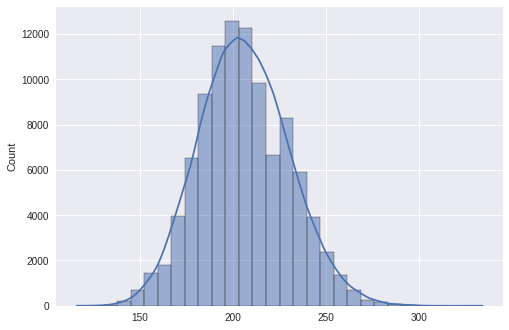

In [172]:
sns.histplot(samples , bins = 30 , kde = True);

In [176]:
from scipy.stats import norm

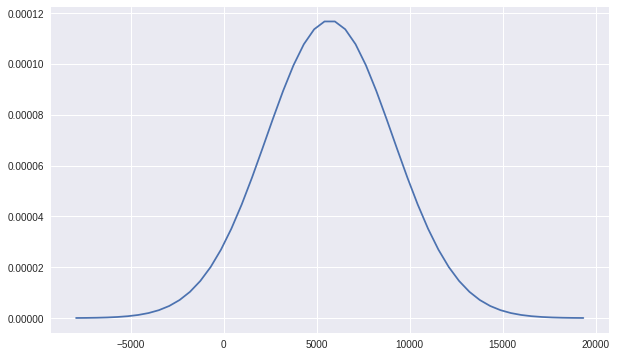

In [179]:
epochs = 30 
mean = expected_val*epochs
std = var**0.5*epochs
deviations = 4
xs = np.linspace(mean - 4*std , mean + 4*std)
fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
ax.plot( xs , norm.pdf(xs , mean , std));

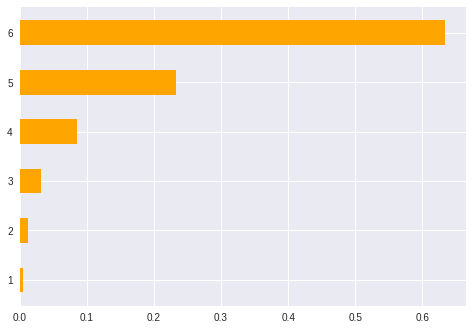

In [80]:
def gibbs_distr(events,m):
    partition = sum([np.e**(i*m) for i in range(1,1+events)])
    return [np.e**(i*m)/partition for i in range(1,1+events)]

events = 6
plt.barh(range(1,events+1),
         gibbs_distr(events,1),
         color = 'orange',
         height = 0.5);

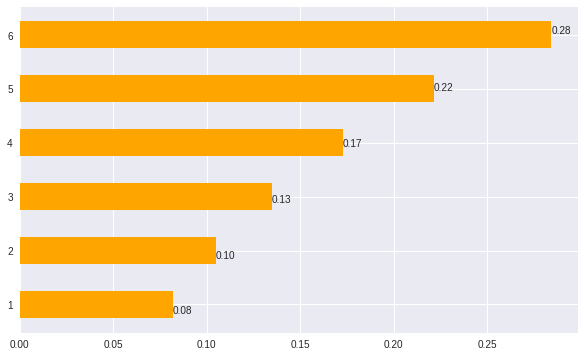

In [81]:
fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))

ax.barh(range(1,events+1),
         gibbs_distr(events,mu),
         color = 'orange',
         height = 0.5)

for i , patch in enumerate(ax.patches):
    ax.annotate( text = f"{gibbs_distr(events,mu)[i]:.2f}" , 
                 xy = (patch.get_x() + gibbs_distr(events,mu)[i] , 
                       patch.get_y() + patch.get_width())
               )